In [ ]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual path to your CSV file
merged_roi_df = pd.read_csv('/content/datasets/final_roi_merged.csv')

# Display the first few rows of the DataFrame
merged_roi_df.head()

,clean_keyword,period,Paid_Cost,revenue,ROI
0,labelmaster,9,3916.89,81601.0619,20.833126
1,labelmastercom,9,668.39,4024.2100,6.020751
2,hazmatplacard,9,509.12,141.3500,0.277636
3,ergbook,9,432.21,164.4847,0.380567
4,emergencyresponseguidebook,9,2759.30,77.0464,0.027922


<ipython-input-2-79af6bc54515>:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


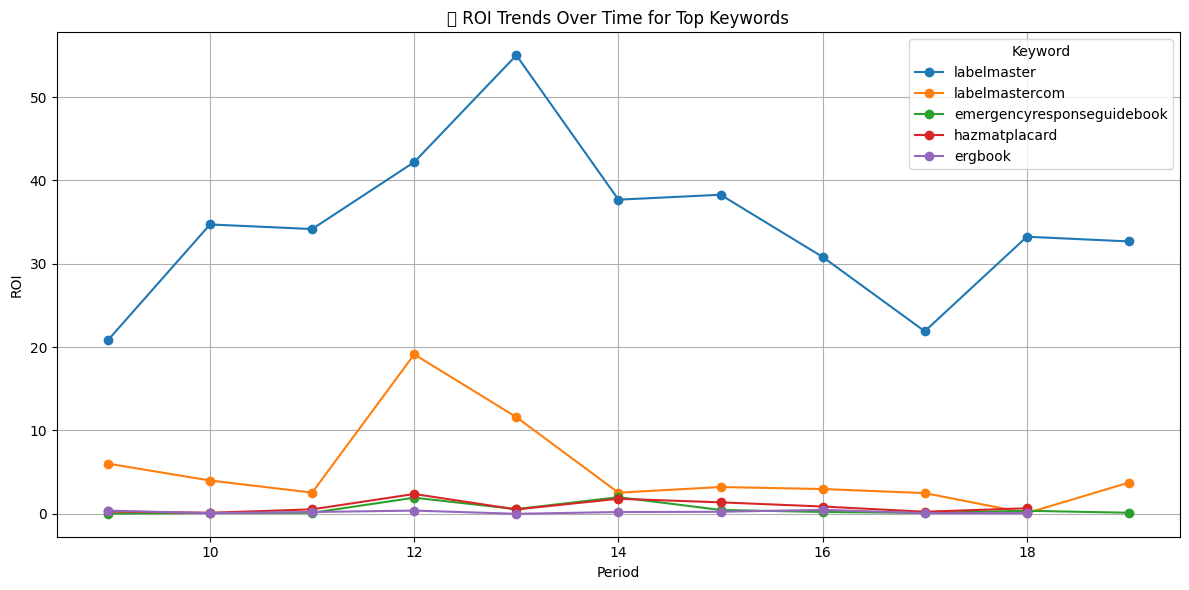

In [ ]:
import matplotlib.pyplot as plt

# Choose top N keywords by frequency or total revenue
top_keywords = merged_roi_df['clean_keyword'].value_counts().head(5).index.tolist()

# Filter dataset for just those keywords
top_keywords_df = merged_roi_df[merged_roi_df['clean_keyword'].isin(top_keywords)]

# Plot
plt.figure(figsize=(12, 6))
for kw in top_keywords:
    subset = top_keywords_df[top_keywords_df['clean_keyword'] == kw]
    plt.plot(subset['period'], subset['ROI'], marker='o', label=kw)

plt.title('📈 ROI Trends Over Time for Top Keywords')
plt.xlabel('Period')
plt.ylabel('ROI')
plt.legend(title='Keyword')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-3-3674a8b9dc0b>:16: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


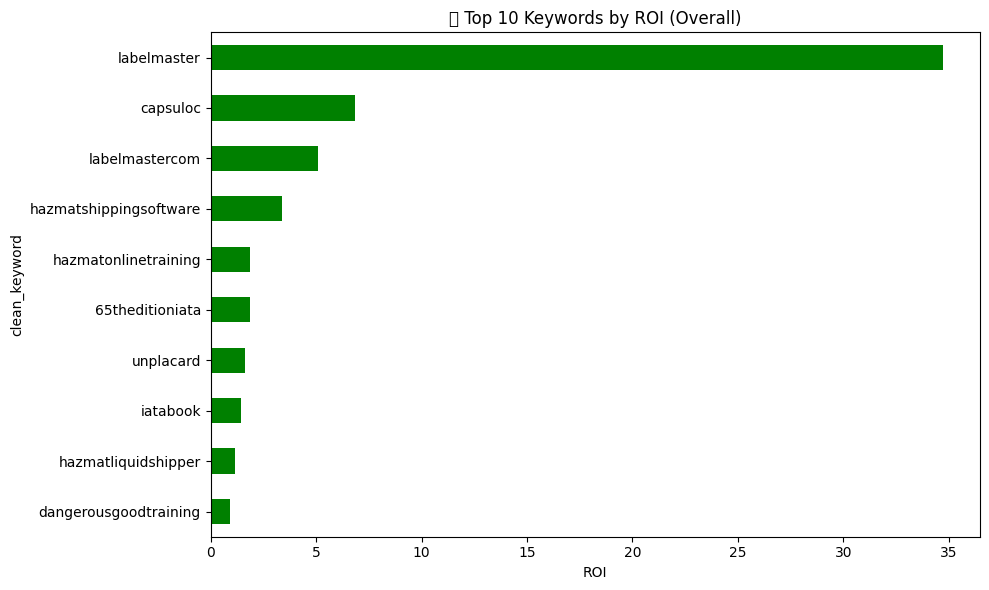

In [ ]:
# Get total revenue and cost by keyword
agg = merged_roi_df.groupby('clean_keyword').agg({
    'Paid_Cost': 'sum',
    'revenue': 'sum'
})
agg['ROI'] = agg['revenue'] / (agg['Paid_Cost'] + 1e-6)

# Top 10 by ROI
top10 = agg.sort_values(by='ROI', ascending=False).head(10)

# Plot
top10['ROI'].plot(kind='barh', figsize=(10, 6), color='green')
plt.title('💸 Top 10 Keywords by ROI (Overall)')
plt.xlabel('ROI')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<ipython-input-4-3a5203bf406c>:25: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


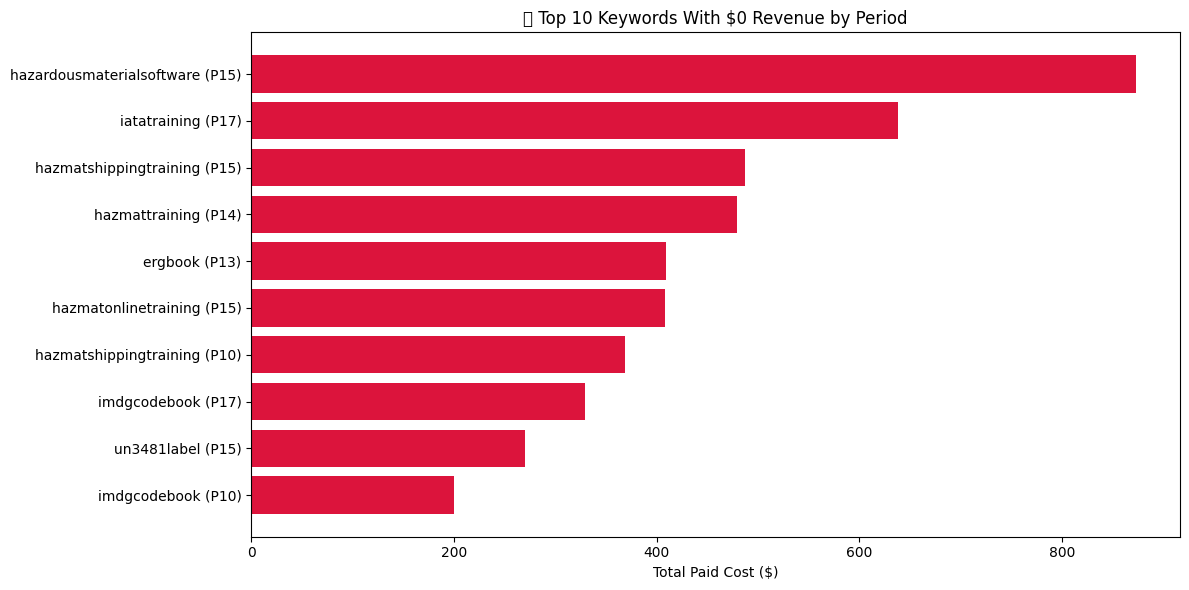

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter rows where revenue is zero
zero_revenue_keywords = merged_roi_df[merged_roi_df['revenue'] == 0]

# Step 2: Group by keyword + period and sum Paid_Cost
zero_revenue_per_period = zero_revenue_keywords.groupby(
    ['clean_keyword', 'period']
)['Paid_Cost'].sum().reset_index()

# Step 3: Sort and get top 10 keywords by wasted spend
top_zero_costs = zero_revenue_per_period.sort_values(by='Paid_Cost', ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(12, 6))
plt.barh(
    top_zero_costs['clean_keyword'] + " (P" + top_zero_costs['period'].astype(str) + ")",
    top_zero_costs['Paid_Cost'],
    color='crimson'
)
plt.title("🛑 Top 10 Keywords With $0 Revenue by Period")
plt.xlabel("Total Paid Cost ($)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<ipython-input-5-370a983b87ce>:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


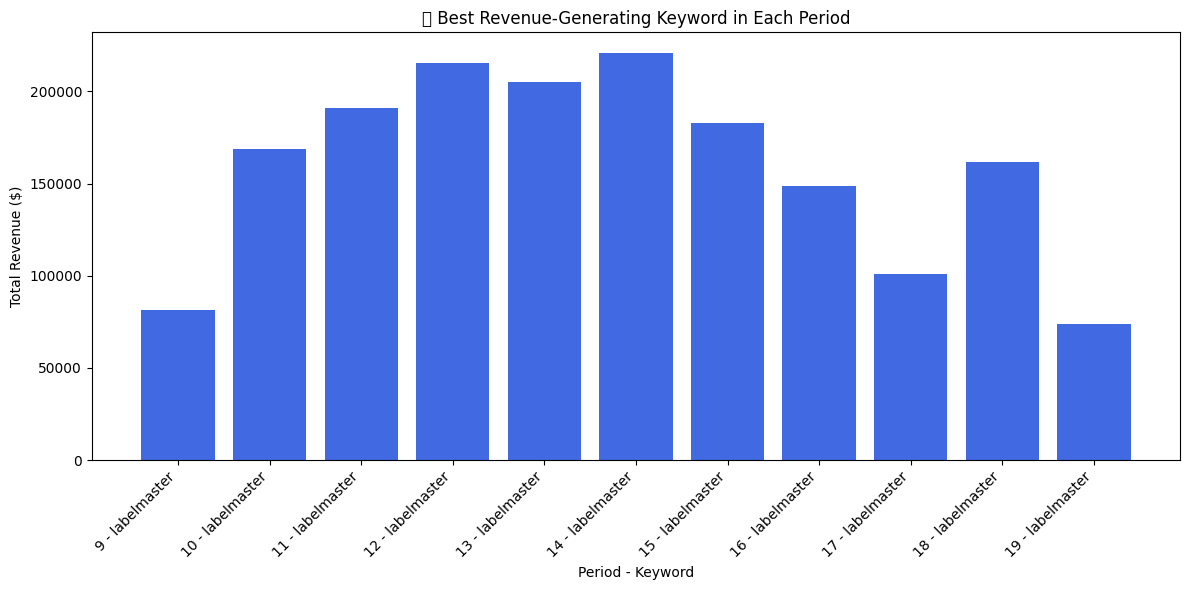

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group revenue by keyword and period
keyword_revenue_by_period = merged_roi_df.groupby(
    ['clean_keyword', 'period']
)['revenue'].sum().reset_index()

# Step 2: Select the top keyword for each period
best_keywords_per_period = keyword_revenue_by_period.loc[
    keyword_revenue_by_period.groupby('period')['revenue'].idxmax()
].sort_values(by='period').reset_index(drop=True)

# Step 3: Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    best_keywords_per_period['period'].astype(str) + " - " + best_keywords_per_period['clean_keyword'],
    best_keywords_per_period['revenue'],
    color='royalblue'
)
plt.xticks(rotation=45, ha='right')
plt.title("💰 Best Revenue-Generating Keyword in Each Period")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Period - Keyword")
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Group by keyword + period and sum revenue
keyword_revenue_by_period = merged_roi_df.groupby(
    ['clean_keyword', 'period']
)['revenue'].sum().reset_index()

# Step 2: Exclude 'labelmaster' and 'labelmastercom'
filtered_keywords = keyword_revenue_by_period[
    ~keyword_revenue_by_period['clean_keyword'].isin(['labelmaster', 'labelmastercom'])
]

# Step 3: Find the top keyword in each period
top_keyword_excluding_labelmaster = filtered_keywords.loc[
    filtered_keywords.groupby('period')['revenue'].idxmax()
].sort_values(by='period').reset_index(drop=True)

# Preview
print(top_keyword_excluding_labelmaster)


                 clean_keyword  period    revenue
0                    49cfrbook       9   482.1600
1        dangerousgoodtraining      10   798.0000
2                  un3481label      11  1270.5300
3   emergencyresponseguidebook      12  3653.3654
4                     iatabook      13  3949.7828
5   emergencyresponseguidebook      14  7745.1939
6                     iatabook      15  5545.6970
7                hazmatplacard      16  1747.6461
8                      dgriata      17  3671.3048
9                     iatabook      18  5774.0600
10                    iatabook      19   424.4100


<ipython-input-7-991ad91998de>:15: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


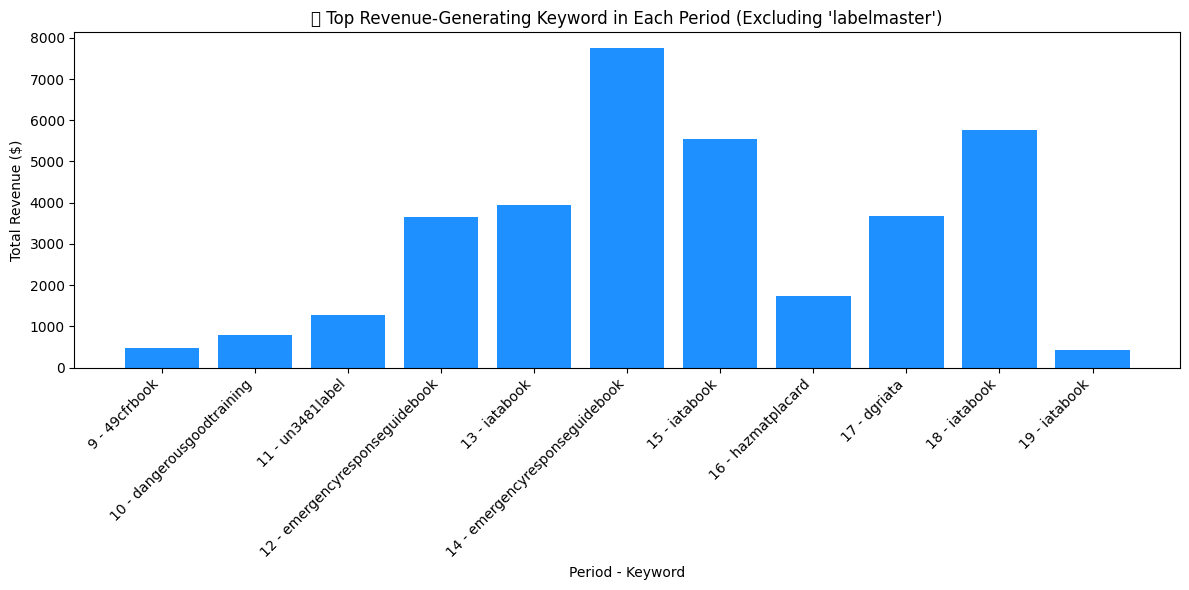

In [ ]:
import matplotlib.pyplot as plt

# Plot the top keyword per period (excluding labelmaster variants)
plt.figure(figsize=(12, 6))
plt.bar(
    top_keyword_excluding_labelmaster['period'].astype(str) + " - " + top_keyword_excluding_labelmaster['clean_keyword'],
    top_keyword_excluding_labelmaster['revenue'],
    color='dodgerblue'
)

plt.xticks(rotation=45, ha='right')
plt.title("💰 Top Revenue-Generating Keyword in Each Period (Excluding 'labelmaster')")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Period - Keyword")
plt.tight_layout()
plt.show()


<ipython-input-8-5891b66b7d0b>:21: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


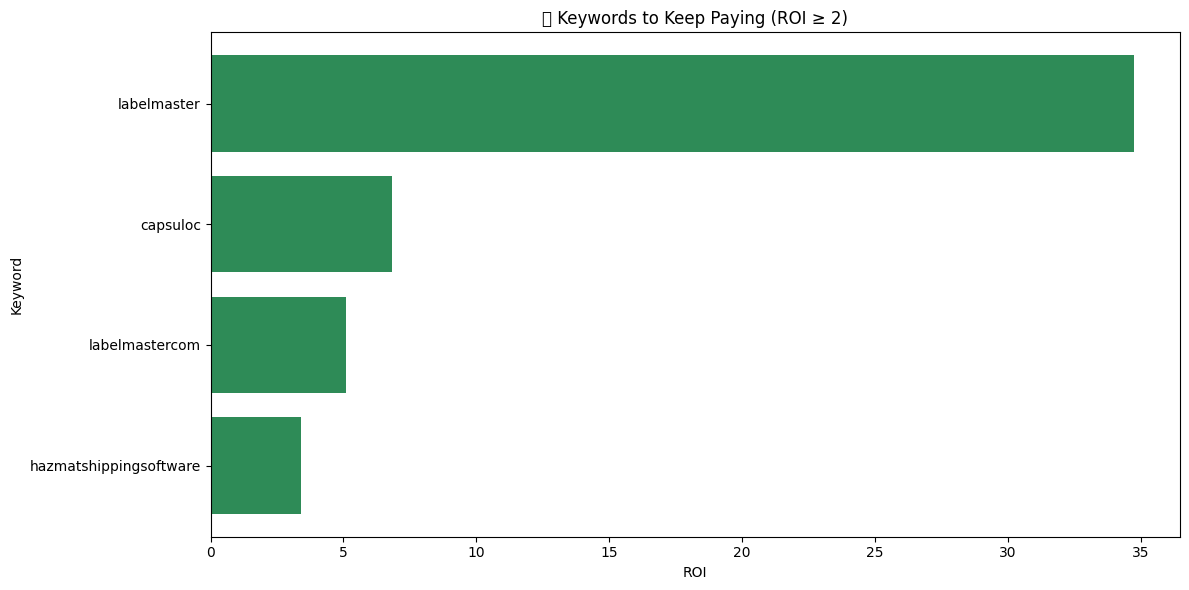

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Group and calculate ROI (if not already done)
keyword_roi = merged_roi_df.groupby('clean_keyword').agg({
    'Paid_Cost': 'sum',
    'revenue': 'sum'
}).reset_index()

keyword_roi['ROI'] = keyword_roi['revenue'] / (keyword_roi['Paid_Cost'] + 1e-6)

# Step 2: Filter keywords with ROI ≥ 2
keep_paid_keywords = keyword_roi[keyword_roi['ROI'] >= 2].sort_values(by='ROI', ascending=False).head(15)

# Step 3: Plot
plt.figure(figsize=(12, 6))
plt.barh(keep_paid_keywords['clean_keyword'], keep_paid_keywords['ROI'], color='seagreen')
plt.title("✅ Keywords to Keep Paying (ROI ≥ 2)")
plt.xlabel("ROI")
plt.ylabel("Keyword")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<ipython-input-9-abd8c57afe44>:18: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


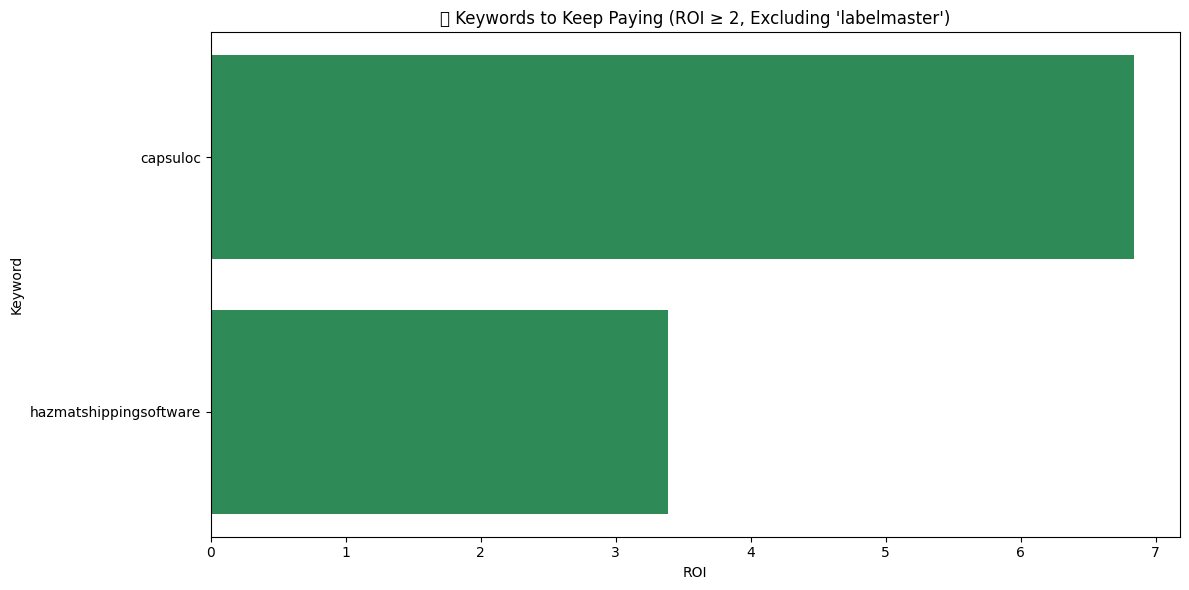

In [ ]:
import matplotlib.pyplot as plt

keyword_roi['ROI'] = keyword_roi['revenue'] / (keyword_roi['Paid_Cost'] + 1e-6)

# Step 2: Filter for ROI ≥ 2 and exclude labelmaster variants
keep_paid_keywords = keyword_roi[
    (keyword_roi['ROI'] >= 2) &
    (~keyword_roi['clean_keyword'].isin(['labelmaster', 'labelmastercom']))
].sort_values(by='ROI', ascending=False).head(15)

# Step 3: Plot
plt.figure(figsize=(12, 6))
plt.barh(keep_paid_keywords['clean_keyword'], keep_paid_keywords['ROI'], color='seagreen')
plt.title("✅ Keywords to Keep Paying (ROI ≥ 2, Excluding 'labelmaster')")
plt.xlabel("ROI")
plt.ylabel("Keyword")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Create a classification-specific DataFrame
df_cls = merged_roi_df.copy()

# Step 2: Create binary label: 1 = Keep Paying (ROI ≥ 2), 0 = Cut Paid
df_cls['label'] = df_cls['ROI'].apply(lambda x: 1 if x >= 2 else 0)

# Step 3: Select features and target
X = df_cls[['Paid_Cost', 'revenue', 'period']]
y = df_cls['label']

# Step 4: Check class distribution
print("Label Distribution:\n", y.value_counts())
print("\nFeature Sample:\n", X.head())


Label Distribution:
 label
0    83
1    31
Name: count, dtype: int64

Feature Sample:
    Paid_Cost     revenue  period
0    3916.89  81601.0619       9
1     668.39   4024.2100       9
2     509.12    141.3500       9
3     432.21    164.4847       9
4    2759.30     77.0464       9


In [ ]:
# Step 1: Create new classification DataFrame
df_cls = merged_roi_df.copy()

# Step 2: Update label logic: 1 = Keep Paying (ROI ≥ 1.5), else 0 = Cut Paid
df_cls['label'] = df_cls['ROI'].apply(lambda x: 1 if x >= 1.5 else 0)

# Step 3: Select features and target
X = df_cls[['Paid_Cost', 'revenue', 'period']]
y = df_cls['label']

# Step 4: Check class distribution
print("Updated Label Distribution:\n", y.value_counts())


Updated Label Distribution:
 label
0    75
1    39
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shape
print("Training shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Training shape: (79, 3)
Test shape: (35, 3)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = clf.predict(X_test_scaled)

# Evaluate
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Accuracy: 0.7428571428571429

📉 Confusion Matrix:
 [[23  0]
 [ 9  3]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        23
           1       1.00      0.25      0.40        12

    accuracy                           0.74        35
   macro avg       0.86      0.62      0.62        35
weighted avg       0.82      0.74      0.69        35



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model with balanced class weights
clf_balanced = LogisticRegression(class_weight='balanced', random_state=42)
clf_balanced.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_balanced = clf_balanced.predict(X_test_scaled)

# Evaluate
print("🔍 Accuracy (balanced):", accuracy_score(y_test, y_pred_balanced))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_balanced))


🔍 Accuracy (balanced): 0.7714285714285715

📉 Confusion Matrix:
 [[21  2]
 [ 6  6]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.75      0.50      0.60        12

    accuracy                           0.77        35
   macro avg       0.76      0.71      0.72        35
weighted avg       0.77      0.77      0.76        35



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Train the model
rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Step 2: Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 3: Evaluate
print("🔍 Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_rf))


🔍 Accuracy (Random Forest): 0.8857142857142857

📉 Confusion Matrix:
 [[23  0]
 [ 4  8]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       1.00      0.67      0.80        12

    accuracy                           0.89        35
   macro avg       0.93      0.83      0.86        35
weighted avg       0.90      0.89      0.88        35



In [ ]:
# Step 1: Convert test set to DataFrame for joining
X_test_df = X_test.copy()
X_test_df['true_label'] = y_test.values
X_test_df['predicted_label'] = y_pred_rf

# Step 2: Merge back with keyword info (clean_keyword + ROI)
test_with_keywords = X_test_df.copy()
test_with_keywords = test_with_keywords.merge(
    df_cls[['Paid_Cost', 'revenue', 'period', 'clean_keyword', 'ROI']],
    on=['Paid_Cost', 'revenue', 'period'],
    how='left'
)

# Step 3: Filter False Negatives (actual = 1, predicted = 0)
false_negatives = test_with_keywords[
    (test_with_keywords['true_label'] == 1) &
    (test_with_keywords['predicted_label'] == 0)
]

# Step 4: View result
print("❌ False Negative Keywords (missed Keep Paying):\n")
print(false_negatives[['clean_keyword', 'Paid_Cost', 'revenue', 'ROI', 'period']])


❌ False Negative Keywords (missed Keep Paying):

             clean_keyword  Paid_Cost    revenue       ROI  period
5                unplacard     238.43   388.9600  1.631338      14
10  hazmatshippingtraining     250.48   399.0000  1.592942      17
29          labelmastercom     811.21  2055.3800  2.533721      14
30         65theditioniata     156.65   289.6886  1.849273      14


In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=2,   # handle class imbalance
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("🔍 Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 Accuracy (XGBoost): 0.9428571428571428

📉 Confusion Matrix:
 [[23  0]
 [ 2 10]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.83      0.91        12

    accuracy                           0.94        35
   macro avg       0.96      0.92      0.93        35
weighted avg       0.95      0.94      0.94        35



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate
print("🔍 Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_gb))


🔍 Accuracy (Gradient Boosting): 0.9142857142857143

📉 Confusion Matrix:
 [[23  0]
 [ 3  9]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.75      0.86        12

    accuracy                           0.91        35
   macro avg       0.94      0.88      0.90        35
weighted avg       0.92      0.91      0.91        35



In [ ]:
import joblib

joblib.dump(scaler, "scaler.pkl")

# Download to local
from google.colab import files

files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

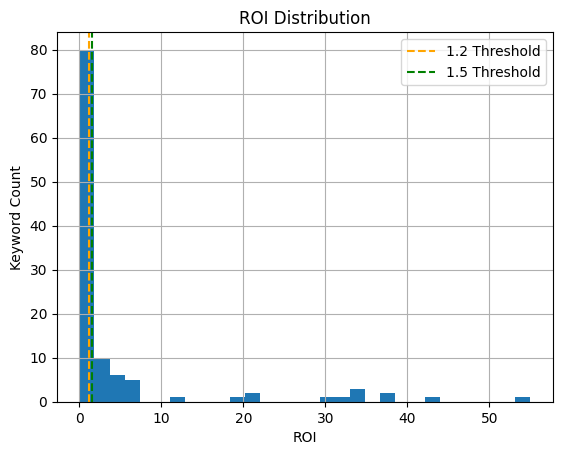

In [ ]:
# Visualize ROI distribution
import matplotlib.pyplot as plt
merged_roi_df['ROI'].hist(bins=30)
plt.axvline(1.2, color='orange', linestyle='--', label='1.2 Threshold')
plt.axvline(1.5, color='green', linestyle='--', label='1.5 Threshold')
plt.title("ROI Distribution")
plt.xlabel("ROI")
plt.ylabel("Keyword Count")
plt.legend()
plt.show()


In [ ]:
# Create new classification DataFrame
df_cls_1_2 = merged_roi_df.copy()

# Update label: 1 = Keep Paying (ROI ≥ 1.2), 0 = Cut Paid
df_cls_1_2['label'] = df_cls_1_2['ROI'].apply(lambda x: 1 if x >= 1.2 else 0)

# Features and target
X = df_cls_1_2[['Paid_Cost', 'revenue', 'period']]
y = df_cls_1_2['label']

# Check class distribution
print("Updated Label Distribution:\n", y.value_counts())


Updated Label Distribution:
 label
0    69
1    45
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Scale the features
scaler_1_2 = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (79, 3)
Test set size: (35, 3)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize XGBoost Classifier
xgb_model_1_2 = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=(69 / 45),  # Balance the slightly uneven class
    random_state=42
)

# Train the model
xgb_model_1_2.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_xgb_1_2 = xgb_model_1_2.predict(X_test_scaled)

# Evaluate
print("🔍 Accuracy (XGBoost with ROI ≥ 1.2):", accuracy_score(y_test, y_pred_xgb_1_2))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_1_2))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_xgb_1_2))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:18:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 Accuracy (XGBoost with ROI ≥ 1.2): 0.9714285714285714

📉 Confusion Matrix:
 [[21  0]
 [ 1 13]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.93      0.96        14

    accuracy                           0.97        35
   macro avg       0.98      0.96      0.97        35
weighted avg       0.97      0.97      0.97        35



In [ ]:
from sklearn.linear_model import LogisticRegression

clf_balanced_1_2 = LogisticRegression(class_weight='balanced', random_state=42)
clf_balanced_1_2.fit(X_train_scaled, y_train)

y_pred_clf = clf_balanced_1_2.predict(X_test_scaled)

print("🔍 Accuracy (Logistic):", accuracy_score(y_test, y_pred_clf))
print(confusion_matrix(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf))


🔍 Accuracy (Logistic): 0.6571428571428571
[[13  8]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.56      0.71      0.62        14

    accuracy                           0.66        35
   macro avg       0.66      0.67      0.65        35
weighted avg       0.68      0.66      0.66        35



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_1_2 = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_1_2.fit(X_train_scaled, y_train)

y_pred_rf = rf_model_1_2.predict(X_test_scaled)

print("🔍 Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔍 Accuracy (Random Forest): 0.8285714285714286
[[20  1]
 [ 5  9]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.90      0.64      0.75        14

    accuracy                           0.83        35
   macro avg       0.85      0.80      0.81        35
weighted avg       0.84      0.83      0.82        35



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model_1_2 = GradientBoostingClassifier(random_state=42)
gb_model_1_2.fit(X_train_scaled, y_train)

y_pred_gb = gb_model_1_2.predict(X_test_scaled)

print("🔍 Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


🔍 Accuracy (Gradient Boosting): 0.8857142857142857
[[19  2]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.86      0.86      0.86        14

    accuracy                           0.89        35
   macro avg       0.88      0.88      0.88        35
weighted avg       0.89      0.89      0.89        35



In [ ]:
joblib.dump(xgb_model_1_2, "xgb_model_1_2.pkl")
files.download("xgb_model_1_2.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(scaler, "scaler_1_2.pkl")
files.download("scaler_1_2.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Prepare feature matrix
X_full = merged_roi_df[['Paid_Cost', 'revenue', 'period']]

# Step 2: Scale using both scalers
X_scaled_1_5 = scaler.transform(X_full)  # from ROI ≥ 1.5 model
X_scaled_1_2 = scaler_1_2.transform(X_full)  # from ROI ≥ 1.2 model

# Step 3: Get predictions from both models
pred_1_5 = xgb_model.predict(X_scaled_1_5)
pred_1_2 = xgb_model_1_2.predict(X_scaled_1_2)

# Step 4: Find common "Keep Paying" predictions
keep_in_both = (pred_1_5 == 1) & (pred_1_2 == 1)

# Step 5: Extract keywords
common_keywords = merged_roi_df[keep_in_both]['clean_keyword'].unique()

# Display results
print("✅ Keywords predicted as 'Keep Paying' in both models:", len(common_keywords))
print(common_keywords[:20])  # show top 20
